In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from math import sqrt

# Load the XML file
file_path = r"C:\Users\Zaman\Downloads\terryRoad.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# Extract namespaces
namespaces = {'ns': 'http://www.landxml.org/schema/LandXML-1.2'}

# Extract profiles information
profiles = {}
for profile in root.findall('.//ns:Profile', namespaces):
    profile_name = profile.get('name')
    surface_name = profile.find('.//ns:ProfSurf', namespaces).get('name')
    state = profile.find('.//ns:ProfSurf', namespaces).get('state')
    pnt_list_2d = profile.find('.//ns:ProfSurf/ns:PntList2D', namespaces).text.strip().split()
    
    x_points = [float(pnt_list_2d[i]) for i in range(0, len(pnt_list_2d), 2)]
    y_points = [float(pnt_list_2d[i + 1]) for i in range(0, len(pnt_list_2d), 2)]
    
    profiles[profile_name] = {
        'Surface Name': surface_name,
        'State': state,
        'X': x_points,
        'Y': y_points
    }

# Create a new workbook and set active worksheet
wb = openpyxl.Workbook()
ws = wb.active

# Write profiles information to Excel
column_index = 1
for profile_name, data in profiles.items():
    col_A = openpyxl.utils.get_column_letter(column_index)
    col_B = openpyxl.utils.get_column_letter(column_index + 1)
    
    ws[f'{col_A}1'] = data['Surface Name']
    ws[f'{col_B}1'] = data['Surface Name']
    
    ws[f'{col_A}2'] = profile_name
    ws[f'{col_B}2'] = profile_name
    
    for i, (x, y) in enumerate(zip(data['X'], data['Y']), start=3):
        ws[f'{col_A}{i}'] = x
        ws[f'{col_B}{i}'] = y
    
    column_index += 2

# Save the workbook
output_file = 'profiles_information.xlsx'
wb.save(output_file)
print(f"Profiles information saved to {output_file}")

# Function to calculate cumulative distance and plot profiles
def plot_profile_corrected(profile_name, profile_data):
    x_coords = profile_data['X']
    y_coords = profile_data['Y']
    
    # Calculate cumulative distance for the X-axis
    distances = [0]
    for i in range(1, len(x_coords)):
        dist = sqrt((x_coords[i] - x_coords[i-1])**2 + (y_coords[i] - y_coords[i-1])**2)
        distances.append(distances[-1] + dist)
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances, y_coords, label=profile_name,font_size = 18)
    plt.xlabel('Cumulative Distance (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title(f'Profile: {profile_name}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{profile_name}.png")  # Save the plot as a PNG file
    plt.show()

# Plot each profile in a separate graph with corrected X-axis
for profile_name, data in profiles.items():
    plot_profile_corrected(profile_name, data)

✅ Profiles information saved to C:\Users\Zaman\Downloads\profiles_information.xlsx
📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - February2024 - Surface 61.png


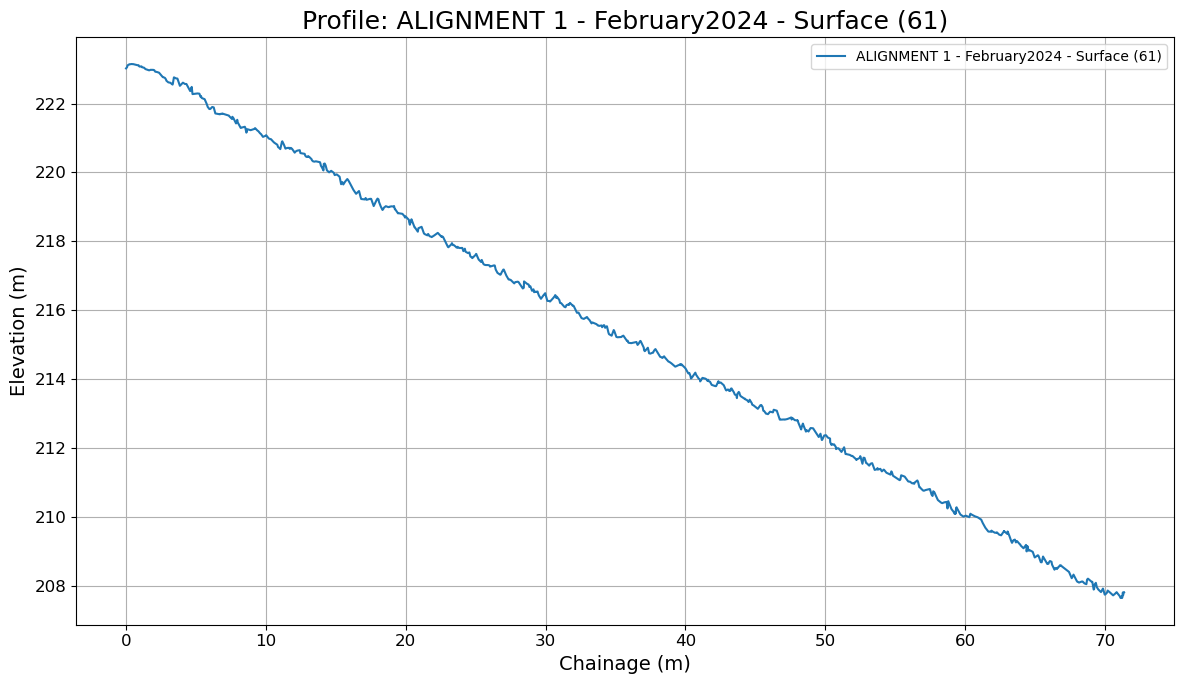

📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - June2023 - Surface 62.png


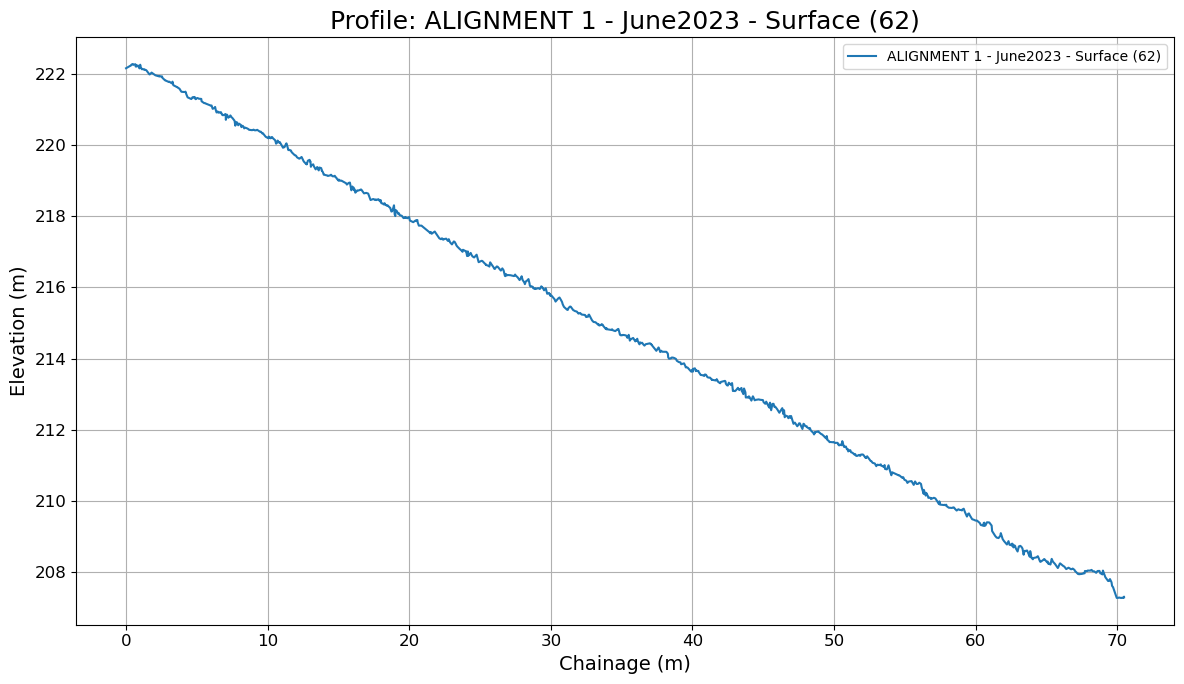

📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - November2024 - Surface 63.png


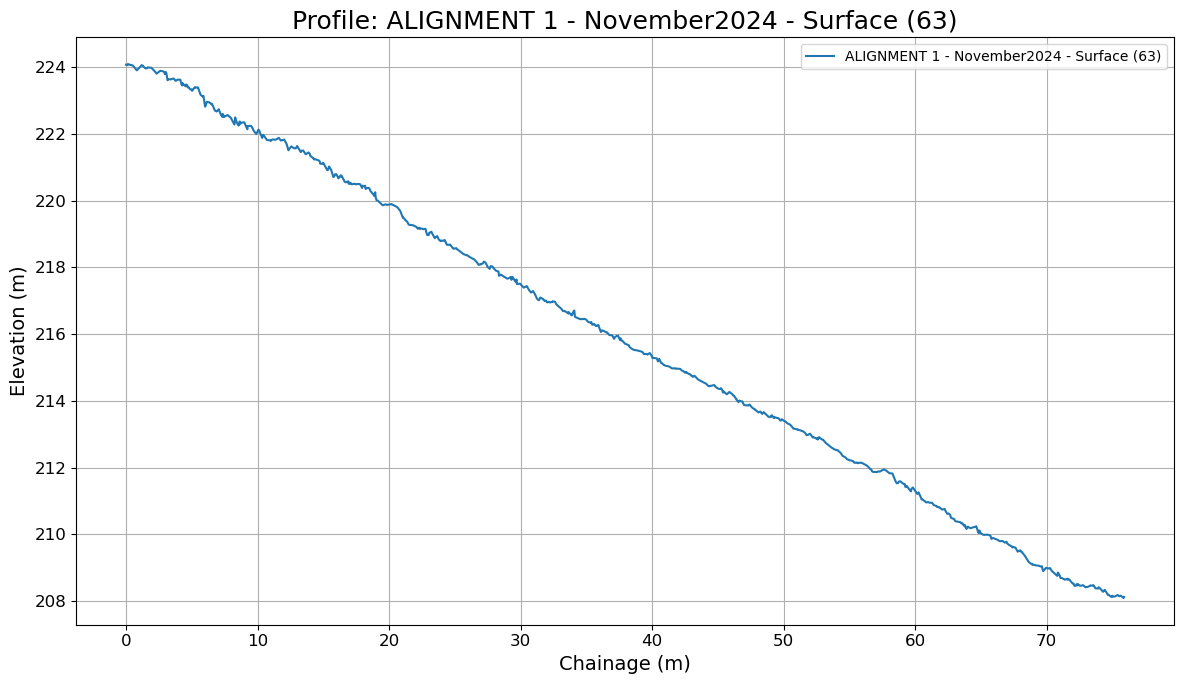

📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - Site3_surface_Fall2021 - Surface 64.png


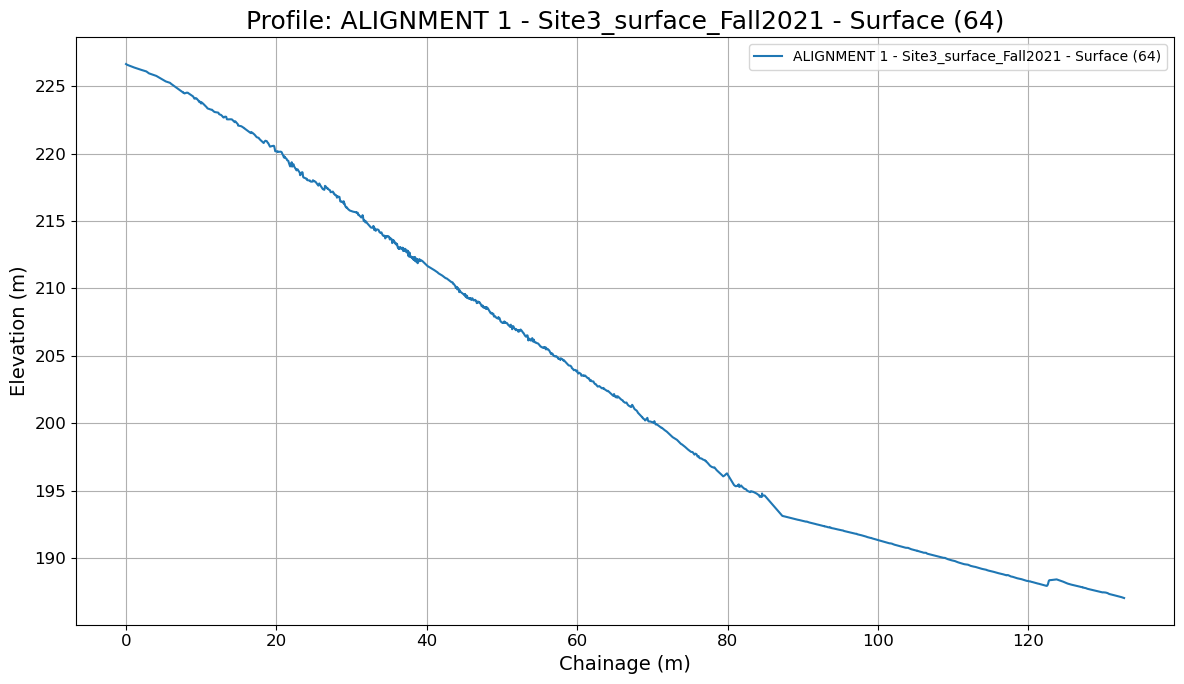

📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - Site3_Surface_Fall2022 - Surface 65.png


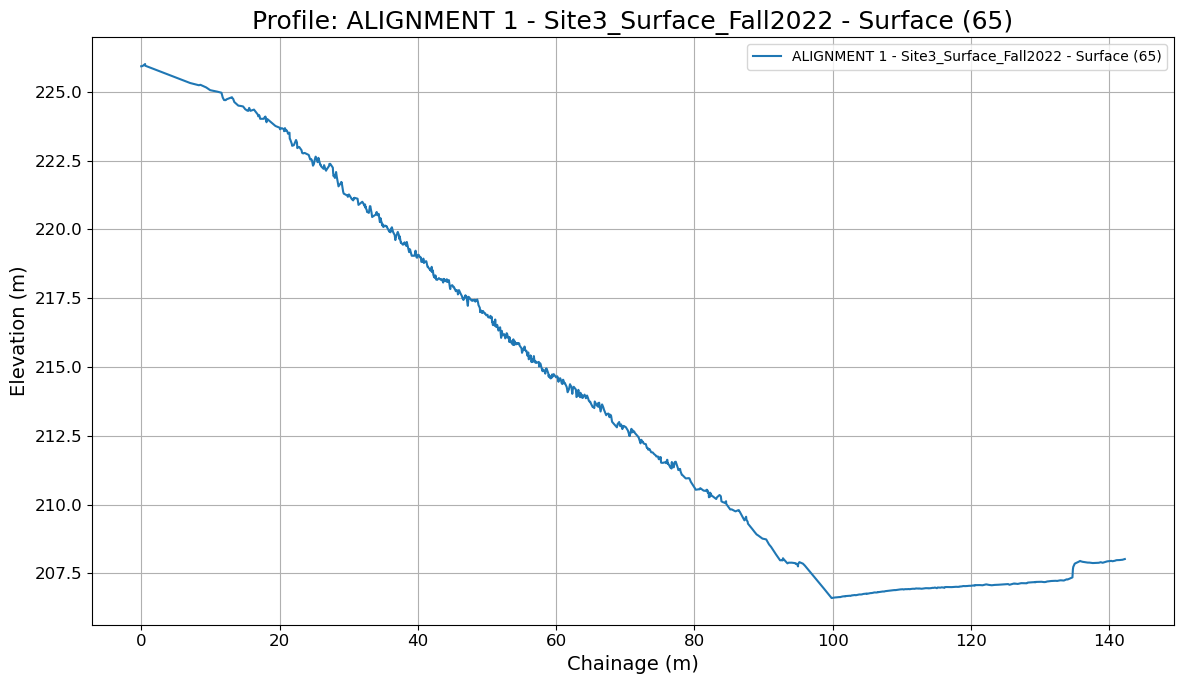

📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - Site3_surface_spring2022 - Surface 66.png


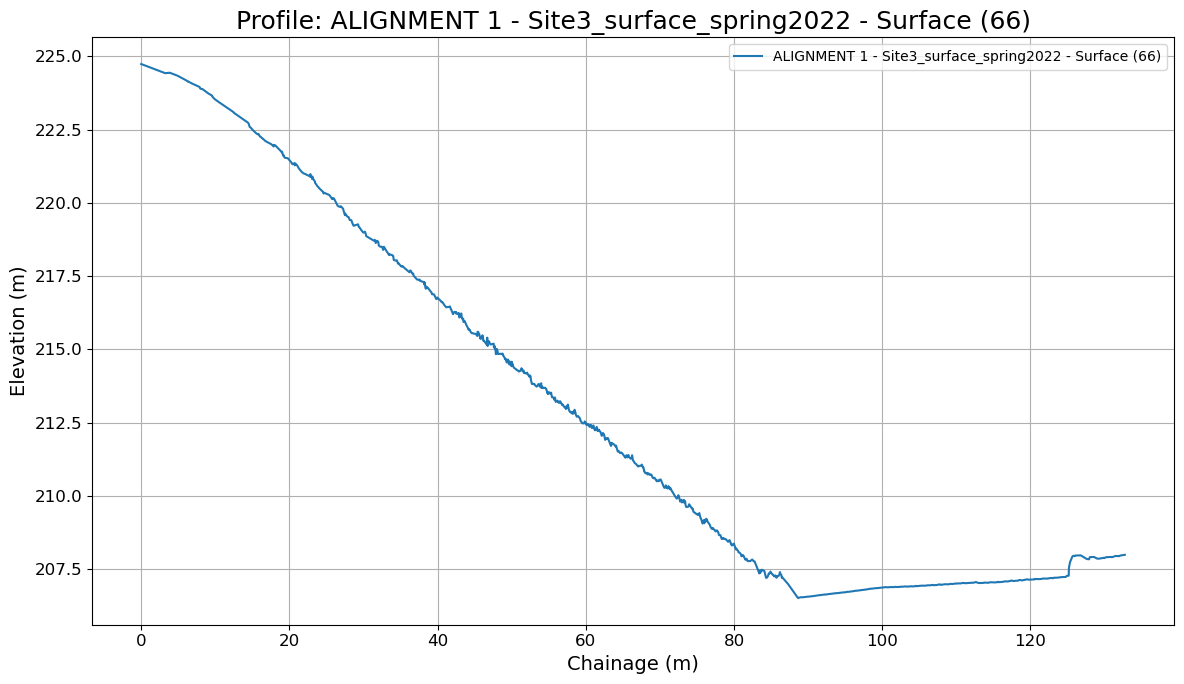

📈 Plot saved to C:\Users\Zaman\Downloads\ALIGNMENT 1 - Site3_surface_summer2021 - Surface 67.png


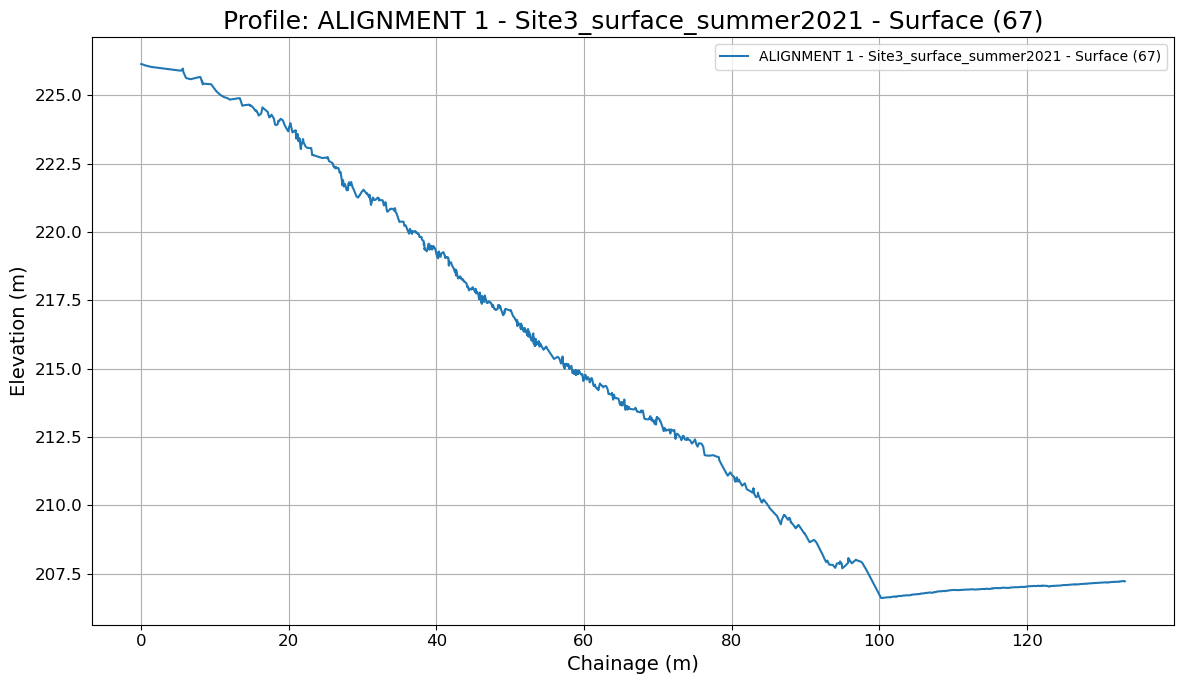

In [7]:
import xml.etree.ElementTree as ET
import openpyxl
import matplotlib.pyplot as plt
from math import sqrt
import os

# --- Choose which file to process ---
# You can change this to your other files as needed.
file_path = r"C:\Users\Zaman\Downloads\terryRoad_LineAA_7162025.xml"
# file_path = r"terryRoad_LineAA_7162025.xml"
# file_path = r"terryRoad_LineBB_7162025.xml"

# --- Get the directory of the input file ---
output_dir = os.path.dirname(os.path.abspath(file_path))

tree = ET.parse(file_path)
root = tree.getroot()

# --- Global Settings ---
namespaces = {'ns': 'http://www.landxml.org/schema/LandXML-1.2'}
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10

# --- Data Extraction ---
profiles_data = {}
# Find all Profile elements in the document
for profile in root.findall('.//ns:Profile', namespaces):
    profile_name = profile.get('name')
    
    # Find all surfaces within this profile
    prof_surfaces = profile.findall('ns:ProfSurf', namespaces)
    
    if not prof_surfaces:
        print(f"⚠️ Skipping alignment '{profile_name}': No surface data found.")
        continue

    for surface in prof_surfaces:
        try:
            surface_name = surface.get('name')
            pnt_list_2d_element = surface.find('ns:PntList2D', namespaces)

            if pnt_list_2d_element is None or not pnt_list_2d_element.text:
                print(f"⚠️ Skipping surface '{surface_name}' in profile '{profile_name}': No point data found.")
                continue

            # Create a unique key for each profile-surface combination
            unique_key = f"{profile_name} - {surface_name}"
            
            pnt_list_2d = pnt_list_2d_element.text.strip().split()
            
            x_points = [float(pnt_list_2d[i]) for i in range(0, len(pnt_list_2d), 2)]
            y_points = [float(pnt_list_2d[i + 1]) for i in range(0, len(pnt_list_2d), 2)]
            
            profiles_data[unique_key] = {
                'X': x_points,
                'Y': y_points
            }
        except (AttributeError, ValueError) as e:
            print(f"Error processing a surface in profile '{profile_name}'. Skipping. Error: {e}")


# --- Excel Output ---
wb = openpyxl.Workbook()
ws = wb.active
ws.title = "Profiles"

column_index = 1
for unique_name, data in profiles_data.items():
    col_A = openpyxl.utils.get_column_letter(column_index)
    col_B = openpyxl.utils.get_column_letter(column_index + 1)
    
    ws[f'{col_A}1'] = "Station"
    ws[f'{col_B}1'] = "Elevation"
    ws.merge_cells(start_row=1, start_column=column_index, end_row=1, end_column=column_index + 1)
    ws[f'{col_A}1'].alignment = openpyxl.styles.Alignment(horizontal='center')
    
    ws[f'{col_A}2'] = unique_name
    ws.merge_cells(start_row=2, start_column=column_index, end_row=2, end_column=column_index + 1)
    ws[f'{col_A}2'].alignment = openpyxl.styles.Alignment(horizontal='center')
    
    for i, (x, y) in enumerate(zip(data['X'], data['Y']), start=3):
        ws[f'{col_A}{i}'] = x
        ws[f'{col_B}{i}'] = y
    
    column_index += 3 # Add extra space between profiles

# Save the workbook
output_excel_path = os.path.join(output_dir, 'profiles_information.xlsx')
wb.save(output_excel_path)
print(f"✅ Profiles information saved to {output_excel_path}")


# --- Plotting Function ---
def plot_profile(name, data, save_dir):
    x_coords = data['X']
    y_coords = data['Y']
    
    # Calculate cumulative distance for the X-axis
    distances = [0]
    for i in range(1, len(x_coords)):
        dist = sqrt((x_coords[i] - x_coords[i-1])**2) # Only consider X for stationing
        distances.append(distances[-1] + dist)
    
    plt.figure(figsize=(12, 7))
    plt.plot(distances, y_coords, label=name) 
    plt.xlabel('Chainage (m)')
    plt.ylabel('Elevation (m)')
    plt.title(f'Profile: {name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Sanitize file name
    safe_name = "".join(c for c in name if c.isalnum() or c in (' ', '-', '_')).rstrip()
    output_png_path = os.path.join(save_dir, f"{safe_name}.png")
    plt.savefig(output_png_path)
    print(f"📈 Plot saved to {output_png_path}")
    plt.show()

# Plot each profile
for name, data in profiles_data.items():
    plot_profile(name, data, output_dir)

✅ Plot with 3x exaggeration saved to C:\Users\Zaman\Downloads\true_alignment_profiles_US49_LineCC_7162025.png


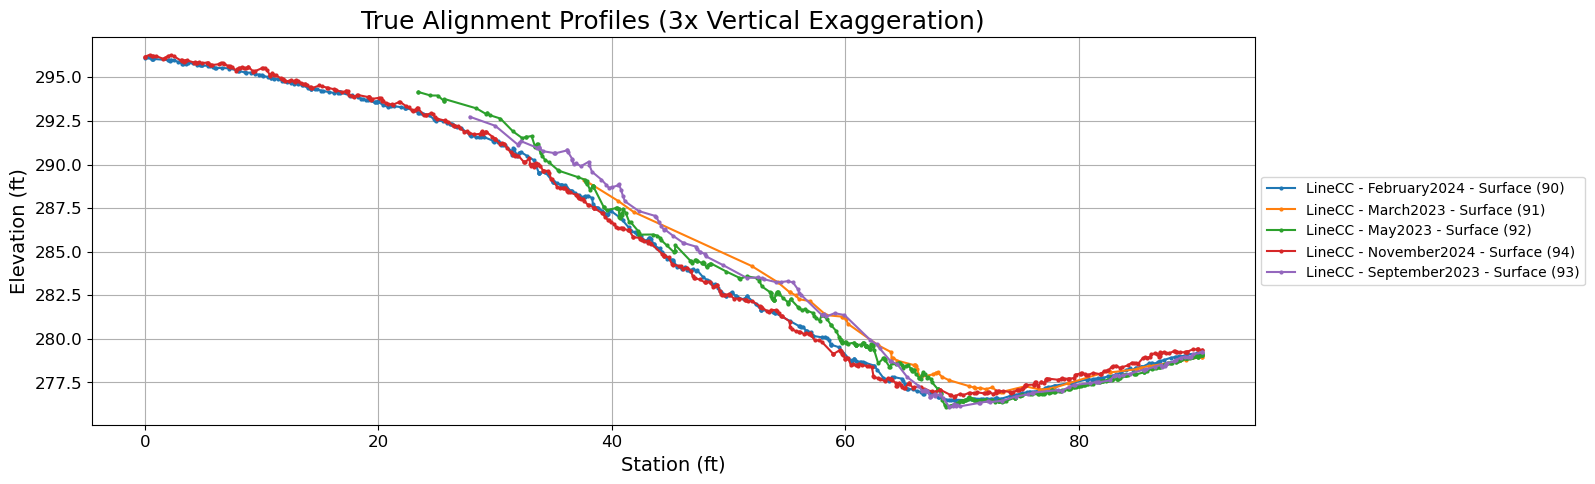

✅ Aligned Excel file saved to C:\Users\Zaman\Downloads\aligned_profiles_for_excel_US49_LineCC_7162025.xlsx


In [30]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# --- ⚙️ HARDCODE YOUR SETTING HERE ⚙️ ---
# Change this number to control the vertical stretch of the plot.
# 10 = 10x vertical exaggeration. 1 = no exaggeration.
vertical_exaggeration = 3
# -----------------------------------------

# --- Configuration & Setup ---
file_path = r"C:\Users\Zaman\Downloads\US49_LineCC_7162025.xml"
output_dir = os.path.dirname(os.path.abspath(file_path))
tree = ET.parse(file_path)
root = tree.getroot()
namespaces = {'ns': 'http://www.landxml.org/schema/LandXML-1.2'}

# Matplotlib plot styling
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10

# --- ✨ NEW: Get the base name of the input file for the suffix ---
base_filename = os.path.splitext(os.path.basename(file_path))[0]
# -------------------------------------------------------------

# --- 1. Extract Raw Data for Plotting ---
plot_data = {}
global_min_x, global_max_x = float('inf'), float('-inf')

for profile in root.findall('.//ns:Profile', namespaces):
    profile_name = profile.get('name')
    for surface in profile.findall('ns:ProfSurf', namespaces):
        try:
            surface_name = surface.get('name')
            pnt_list_2d_element = surface.find('ns:PntList2D', namespaces)
            if pnt_list_2d_element is None or not pnt_list_2d_element.text:
                continue

            unique_key = f"{profile_name} - {surface_name}"
            pnt_list_2d = pnt_list_2d_element.text.strip().split()

            # Use the true horizontal (X) and vertical (Y) coordinates
            x_points = [float(pnt_list_2d[i]) for i in range(0, len(pnt_list_2d), 2)]
            y_points = [float(pnt_list_2d[i + 1]) for i in range(0, len(pnt_list_2d), 2)]

            if not x_points: continue

            plot_data[unique_key] = {'x': x_points, 'y': y_points}

            # Find the total horizontal range for the Excel export
            global_min_x = min(global_min_x, x_points[0])
            global_max_x = max(global_max_x, x_points[-1])

        except (AttributeError, ValueError):
            continue

# --- 2. Plotting with True Alignment & Exaggeration ---
fig, ax = plt.subplots(figsize=(15, 8))

for name, data in plot_data.items():
    ax.plot(data['x'], data['y'], label=name, marker='o', markersize=2)

ax.set_title(f'True Alignment Profiles ({vertical_exaggeration}x Vertical Exaggeration)')
ax.set_xlabel('Station (ft)')
ax.set_ylabel('Elevation (ft)')

# Apply the vertical exaggeration by setting the plot's aspect ratio
x_range = ax.get_xlim()[1] - ax.get_xlim()[0]
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
if y_range > 0: # Avoid division by zero
    ax.set_aspect(x_range / (y_range * vertical_exaggeration))

ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# --- ✨ MODIFIED: Add suffix to the plot filename ---
output_plot_path = os.path.join(output_dir, f'true_alignment_profiles_{base_filename}.png')
fig.savefig(output_plot_path, bbox_inches='tight')
print(f"✅ Plot with {vertical_exaggeration}x exaggeration saved to {output_plot_path}")
plt.show()

# --- 3. Create Aligned Data for Excel Export ---
# Create a master horizontal axis for comparing elevations at the same station
master_x_axis = np.linspace(global_min_x, global_max_x, num=2000)
excel_data = {'Station': master_x_axis}

# Interpolate each profile onto the master axis
for name, data in plot_data.items():
    interpolated_elevation = np.interp(master_x_axis, data['x'], data['y'])
    excel_data[name] = interpolated_elevation

df = pd.DataFrame(excel_data)
# --- ✨ MODIFIED: Add suffix to the Excel filename ---
output_excel_path = os.path.join(output_dir, f'aligned_profiles_for_excel_{base_filename}.xlsx')
df.to_excel(output_excel_path, index=False)
print(f"✅ Aligned Excel file saved to {output_excel_path}")